### Visualizing the Data

##### <br>
-Does Level of Unification have an impact on shutdowns? <br>
-Does shutdown have any impact on unemployment rates? <br>
-Plot of approval ratings prior and after shutdowns <br>
-Visualiation of government employees across the country

In [21]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [15]:
file_path = '../Input/output.xlsx'

In [16]:
party_df = pd.read_excel(file_path)

In [17]:
party_df

,years,president,party_president,house_dem_seats,house_rep_seats,house_other_seats,senate_dem_seats,senate_rep_seats,senate_other_seats,gov_status,term_start,term_end,number_shutdown
0,1975-76,Ford,R,291,144,0,61,38,1,divided,1975,1976,1
1,1977-78,Carter,D,292,143,0,62,38,0,unified,1977,1978,4
2,1979-80,Carter,D,277,158,0,59,41,0,unified,1979,1980,1
3,1981-82,Reagan,R,243,192,0,47,53,0,divided,1981,1982,3
4,1983-84,Reagan,R,269,166,0,46,54,0,divided,1983,1984,3
5,1985-86,Reagan,R,253,182,0,47,53,0,divided,1985,1986,1
6,1987-88,Reagan,R,258,177,0,55,45,0,divided,1987,1988,1
7,1989-90,"Bush, GHW",R,260,175,0,55,45,0,divided,1989,1990,1
8,1991-92,Bush,R,267,167,1,56,44,0,divided,1991,1992,0
9,1993-94,Clinton,D,258,176,1,57,43,0,unified,1993,1994,0


In [18]:
party_df.gov_status.value_counts()

divided    16
unified     7
Name: gov_status, dtype: int64

In [32]:
groupby_status = party_df['gov_status'].groupby(party_df['party_president'])
groupby_status.value_counts()

party_president  gov_status
D                divided        6
                 unified        4
R                divided       10
                 unified        3
Name: gov_status, dtype: int64

AttributeError: 'NoneType' object has no attribute 'update'

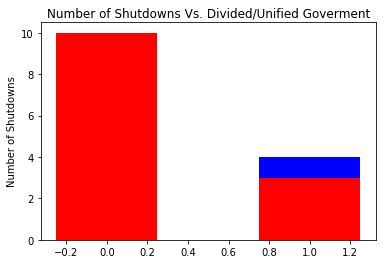

In [41]:
N = 2
dems = (6,4)
reps = (10,3)

ind = np.arange(N)  

width = 0.5 

p1 = plt.bar(ind, dems, width,color='b')
p2 = plt.bar(ind, reps, width, color='r')

plt.ylabel('Number of Shutdowns')
plt.title('Number of Shutdowns Vs. Divided/Unified Goverment')
plt.xticks('Divided','Unified')
plt.yticks(np.arange(0, 12, 2))
plt.legend((p1[0], p2[0]), ('Democrats', 'Republicans'))


# x_axis=("Divided", "Unified")
# plt.bar(x_axis, party_df.gov_status.value_counts(), color=["r","b"], align="center")

# #plt.xticks(x_axis, cities)


# #Set the limits of the x axis
# #plt.xlim(-0.75, len(x_axis)-0.25)
# #Set the limits of the y axis
# #plt.ylim(0, max(bars_in_cities)*1.05)

# #Give the chart a title, x label, and y label
# plt.title("Number of Shutdowns vs. Unified/Divided Government")
# plt.xlabel("Status of Parties")
# plt.ylabel("Number of Shutdowns")

# #Save an image of the chart and print it to the screen
# #plt.savefig("../Output/unified_vs_divided.png")
# plt.show()

,years,president,party_president,house_dem_seats,house_rep_seats,house_other_seats,senate_dem_seats,senate_rep_seats,senate_other_seats,gov_status,term_start,term_end,number_shutdown
0,1975-76,Ford,R,291,144,0,61,38,1,divided,1975,1976,1
1,1977-78,Carter,D,292,143,0,62,38,0,unified,1977,1978,4
2,1979-80,Carter,D,277,158,0,59,41,0,unified,1979,1980,1
3,1981-82,Reagan,R,243,192,0,47,53,0,divided,1981,1982,3
4,1983-84,Reagan,R,269,166,0,46,54,0,divided,1983,1984,3
5,1985-86,Reagan,R,253,182,0,47,53,0,divided,1985,1986,1
6,1987-88,Reagan,R,258,177,0,55,45,0,divided,1987,1988,1
7,1989-90,"Bush, GHW",R,260,175,0,55,45,0,divided,1989,1990,1
8,1991-92,Bush,R,267,167,1,56,44,0,divided,1991,1992,0
9,1993-94,Clinton,D,258,176,1,57,43,0,unified,1993,1994,0
